In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [3]:
df = pd.read_csv('1.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'PRN', 'Epoch_Time_of_Clock',
       'SV_Clock_Bias', 'SV_Clock_Drift', 'SV_Clock_Drift_Rate', 'IODE', 'Crs',
       'Del_n', 'M0', 'Cuc', 'e', 'Cus', 'sqrt_A', 'Toe', 'Cic', 'OMEGA',
       'Cis', 'i0', 'Crc', 'omega', 'OMEGA_dot', 'I_dot', 'Codes', 'GPS_week',
       'L2_P_Data_flag', 'SV_accuracy', 'SV_health', 'Tgd', 'IODC', 'T_Tx',
       'Fit_Interval'],
      dtype='object')

In [5]:
df1 = pd.to_datetime(df['Epoch_Time_of_Clock'])
df['Epoch_Time_of_Clock']=df1
df.index = pd.to_datetime(df['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S')

In [6]:
df1 = pd.concat([df['sqrt_A'] , df['e'],df['i0'],df['omega'],df['OMEGA'],df['Del_n'],df['M0']],axis=1)
df1.head()

,sqrt_A,e,i0,omega,OMEGA,Del_n,M0
Epoch_Time_of_Clock,,,,,,,
2017-11-01 14:00:00,5153.670197,0.007094,0.968712,0.632720,1.009373,4.874846e-09,2.755637
2017-11-01 16:00:00,5153.669188,0.007095,0.968713,0.632739,1.009313,4.916991e-09,-2.477381
2017-11-01 18:00:00,5153.669888,0.007095,0.968716,0.632683,1.009252,4.874846e-09,-1.427139
2017-11-01 20:00:00,5153.670305,0.007095,0.968717,0.632654,1.009192,4.875203e-09,-0.376924
2017-11-01 22:00:00,5153.673241,0.007096,0.968719,0.632704,1.009131,4.753055e-09,0.673209


In [7]:
df1.dtypes #Keplerian parameters

sqrt_A    float64
e         float64
i0        float64
omega     float64
OMEGA     float64
Del_n     float64
M0        float64
dtype: object

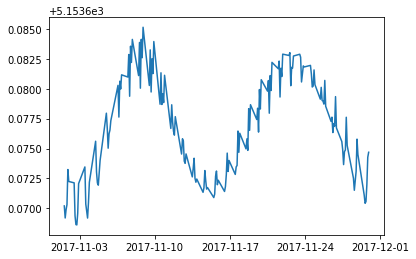

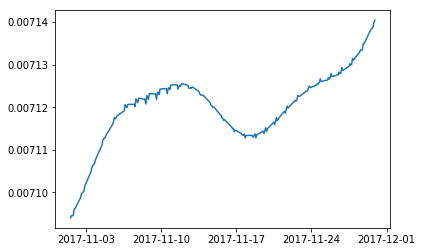

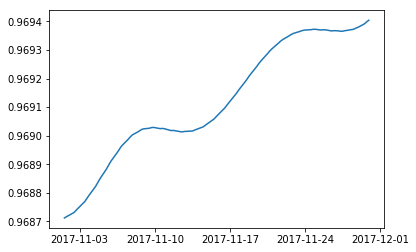

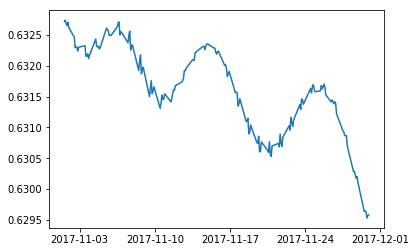

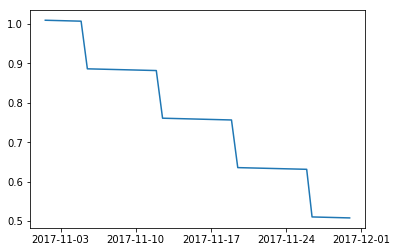

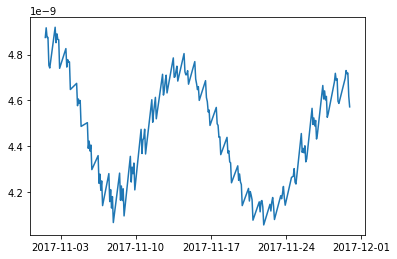

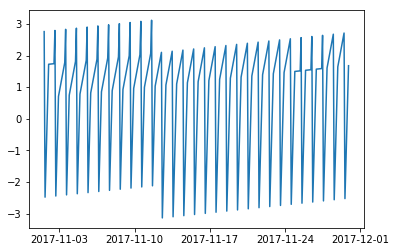

In [8]:
for i in range(0,7):
    x = df1.index
    y = df1.iloc[:,i]
    plt.plot(x,y)
    plt.show()

In [9]:
import plotly.tools as tls

tls.get_embed('http://plt.ly/~chris/16')

PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, 'http://plt.ly/~chris/16', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [ ]:
for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = XGBRegressor(max_depth=6)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    print(train)    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = RandomForestRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()


Mean Square error"  0.00122119473806


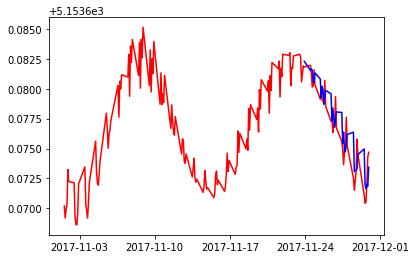


Mean Square error"  6.9926018551e-07


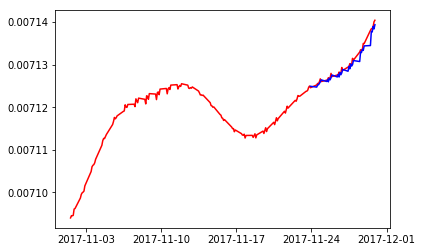


Mean Square error"  2.37109325919e-06


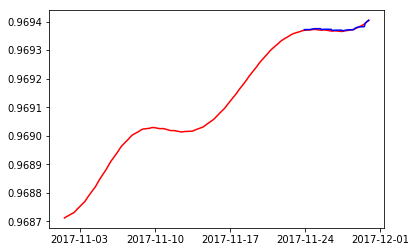


Mean Square error"  9.37676091597e-05


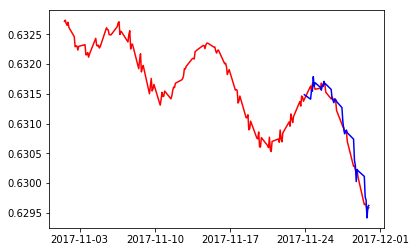


Mean Square error"  0.00397607976212


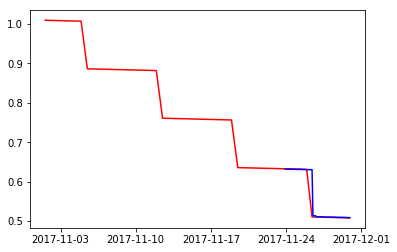


Mean Square error"  7.89636615849e-11


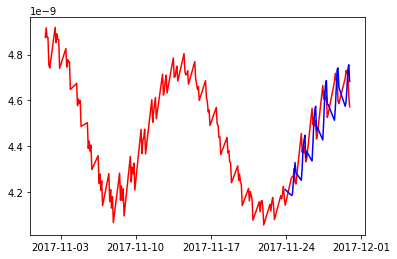


Mean Square error"  0.769964147931


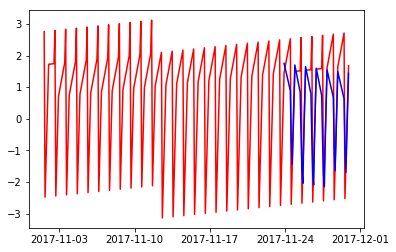

In [11]:
from sklearn.linear_model import LinearRegression
for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:]
    

    train=train.dropna(how="any")
    #print(train)
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]
    #print(ytrain)
    xgb = LinearRegression()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [10]:
#linear for sqrt_A
df3 = pd.DataFrame()

for i in range(1, 6):
    df3["lag_{}".format(i)] = df1.sqrt_A.shift(i)
    
train = df3.iloc[0:137]
test = df3.iloc[137:177]
    
train=train.dropna(how="any")

m = df1['sqrt_A']
ytrain=m.iloc[5:137]
ytest =m.iloc[137:]

xgb = LinearRegression()
xgb.fit(train, ytrain)
    
preds = xgb.predict(test)

print('\nMean Square error" ', mean_absolute_error(ytest,preds))


Mean Square error"  0.00122119473806


In [ ]:
ytest

In [ ]:
xgb.coef_

In [ ]:
xgb.intercept_

In [ ]:
#lasso 
from sklearn import linear_model 

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = linear_model.Lasso(alpha=0.5)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#ridge
from sklearn.linear_model import Ridge

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = Ridge(alpha=0.2)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#ElasticNet
from sklearn.linear_model import ElasticNet

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = ElasticNet(random_state=0)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#HuberRegressor
from sklearn.linear_model import HuberRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = HuberRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#Lars
from sklearn.linear_model import Lars

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = Lars()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#LassoLars
from sklearn.linear_model import LassoLars

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = LassoLars(alpha=0.01)
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#PassiveAgressiveRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = PassiveAggressiveRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = SGDRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#RANSACRegressor
from sklearn.linear_model import RANSACRegressor

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = RANSACRegressor()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()

In [ ]:
#SVR
from sklearn import svm

for j in range(0,7):
    s = df1.iloc[:,j]
    df3 = pd.DataFrame()

    for i in range(1, 6):
        df3["lag_{}".format(i)] = df1.iloc[:,j].shift(i)
    
    train = df3.iloc[0:137]
    test = df3.iloc[137:177]
    
    train=train.dropna(how="any")
    
    m = df1.iloc[:,j]
    ytrain=m.iloc[5:137]
    ytest =m.iloc[137:]

    xgb = svm.SVR()
    xgb.fit(train, ytrain)
    
    preds = xgb.predict(test)
   
    print('\nMean Square error" ', mean_absolute_error(ytest,preds))
    
    pred = pd.DataFrame(data=preds, index=ytest.index)
    
    plt.plot(df1.index,df1.iloc[:,j],color="red")
    #plt.plot(ytrain.index,ytrain,color="green")
    plt.plot(pred,color="blue")
    plt.show()